# <center>CLEAN WATER AND SANITATION</center>
<center><img src= "https://cdn.imweb.me/upload/S202108243f92708905182/b551dffc90f4f.jpg" alt ="Titanic" style='width:500px;'></center><br>

Clean water and sanitation are essential for promoting public health and ensuring the well-being of communities worldwide. Access to clean water is a fundamental human right, yet millions of people around the world lack access to safe drinking water and basic sanitation facilities. Lack of access to clean water and sanitation is a major cause of disease, particularly in low-income countries, where inadequate infrastructure and poor hygiene practices contribute to the spread of waterborne illnesses. Ensuring access to clean water and sanitation is critical for reducing mortality rates, improving overall health outcomes, and promoting economic development. Effective water and sanitation management requires a combination of infrastructure development, public education, and policy reforms, as well as innovative technologies such as machine learning to improve water quality and optimize treatment processes. Addressing the challenges of clean water and sanitation is essential for achieving sustainable development goals and promoting global health and well-being.

## What is sanitation ?

Sanitation refers to the measures taken to promote and preserve public health by preventing the spread of diseases through various forms of environmental controls, such as the treatment and disposal of sewage and waste, the provision of clean water and hygiene facilities, and the promotion of good hygiene practices. Sanitation is a critical aspect of public health and is essential for preventing the spread of infectious diseases, reducing child mortality rates, and improving the overall quality of life for individuals and communities. 

## About Dataset

Dataset contains data for clean water, sanitation and hygiene.

website from which the data set is taken:
 
https://ourworldindata.org/explorers/water-and-sanitation?region=Africa&facet=none&Resource=Drinking+water&Level+of+Access=Basic&Residence=Total&Relative+to+population=Share+of+population&country=IND~USA~KEN~OWID_WRL~BGD~ZAF~CHN

And also datasets on deaths due to unsafe water and sanitation:

https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor
https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor

# <div style="color:green;"><b> Let's get started then. !!! </b></div>

Firstly, we start by importing the libraries we will use.

In [34]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

We continue by reading and analyzing our datasets...

In [8]:
df_wat_san=pd.read_csv('/water-and-sanitation (1).csv')
df_uns_wat = pd.read_csv("/share-deaths-unsafe-water.csv")
df_uns_san = pd.read_csv("/share-deaths-unsafe-sanitation.csv")

In [12]:
df_wat_san.head()

,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,...,wat_bas_without,wat_sm_without,san_imp_number_without,san_bas_number_without,san_sm_number_without,san_imp_without,san_bas_without,san_sm_without,hyg_bas_number_without,hyg_bas_without
0,31.83,28.17,3.66,43.18,24.99,10.93,27.52,21.87,5.65,46.68,...,71.83,89.07,15061452.0,16235214.0,NaN,72.48,78.13,NaN,NaN,NaN
1,31.86,28.20,3.66,43.17,24.97,10.94,27.54,21.88,5.66,46.68,...,71.80,89.06,15656386.0,16879101.0,NaN,72.46,78.12,NaN,NaN,NaN
2,34.19,30.24,3.95,41.69,24.12,11.73,29.27,23.27,6.00,45.74,...,69.76,88.27,15984867.0,17340626.0,NaN,70.73,76.73,NaN,NaN,NaN
3,36.51,32.27,4.24,40.21,23.28,12.51,31.01,24.67,6.34,44.81,...,67.73,87.49,16338160.0,17839408.0,NaN,68.99,75.33,NaN,NaN,NaN
4,38.85,34.33,4.52,38.72,22.42,13.31,32.76,26.07,6.69,43.87,...,65.67,86.69,16627222.0,18281012.0,NaN,67.24,73.93,NaN,NaN,NaN


In [13]:
df_wat_san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Columns: 118 entries, Access to improved drinking water to hyg_bas_without
dtypes: float64(116), int64(1), object(1)
memory usage: 4.6+ MB


In [14]:
df_uns_wat.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.05
1,Afghanistan,AFG,1991,1.05
2,Afghanistan,AFG,1992,1.07
3,Afghanistan,AFG,1993,1.28
4,Afghanistan,AFG,1994,1.19


In [15]:
df_uns_wat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Entity                                                                                                6840 non-null   object 
 1   Code                                                                                                  6150 non-null   object 
 2   Year                                                                                                  6840 non-null   int64  
 3   Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: Age-standardized (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [115]:
df = df_uns_wat.rename(columns={'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: Age-standardized (Percent)': 'Deaths_cause'}, inplace = True)

In [16]:
df_uns_san.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.79
1,Afghanistan,AFG,1991,0.79
2,Afghanistan,AFG,1992,0.81
3,Afghanistan,AFG,1993,0.97
4,Afghanistan,AFG,1994,0.89


In [17]:
df_uns_san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Entity                                                                                              6840 non-null   object 
 1   Code                                                                                                6150 non-null   object 
 2   Year                                                                                                6840 non-null   int64  
 3   Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: Age-standardized (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [114]:
df = df_uns_san.rename(columns={'Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: Age-standardized (Percent)': 'Deathss_cause'}, inplace = True)

# EDA

## With Missingno to check null/missing values

In [18]:
def calculate_missing_percentage(df):
    missing_values_count = df.isnull().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    missing_percentage = (total_missing/total_cells) * 100
    return missing_percentage

In [19]:
missing_percentage1 = calculate_missing_percentage(df_wat_san)
missing_percentage2 = calculate_missing_percentage(df_uns_san)
missing_percentage3 = calculate_missing_percentage(df_uns_wat)
print("Percentage of missing values in water-and-sanitation.csv:", missing_percentage1)
print("Percentage of missing values in share-deaths-unsafe-sanitation.csv:", missing_percentage2)
print("Percentage of missing values in share-deaths-unsafe-water.csv:", missing_percentage3)

Percentage of missing values in water-and-sanitation.csv: 35.10243010709957
Percentage of missing values in share-deaths-unsafe-sanitation.csv: 2.5219298245614032
Percentage of missing values in share-deaths-unsafe-water.csv: 2.5219298245614032


## Why I use the missingno ? 

Since water and sanitation contains too many columns, it is possible to see all columns with this graph

<Axes: >

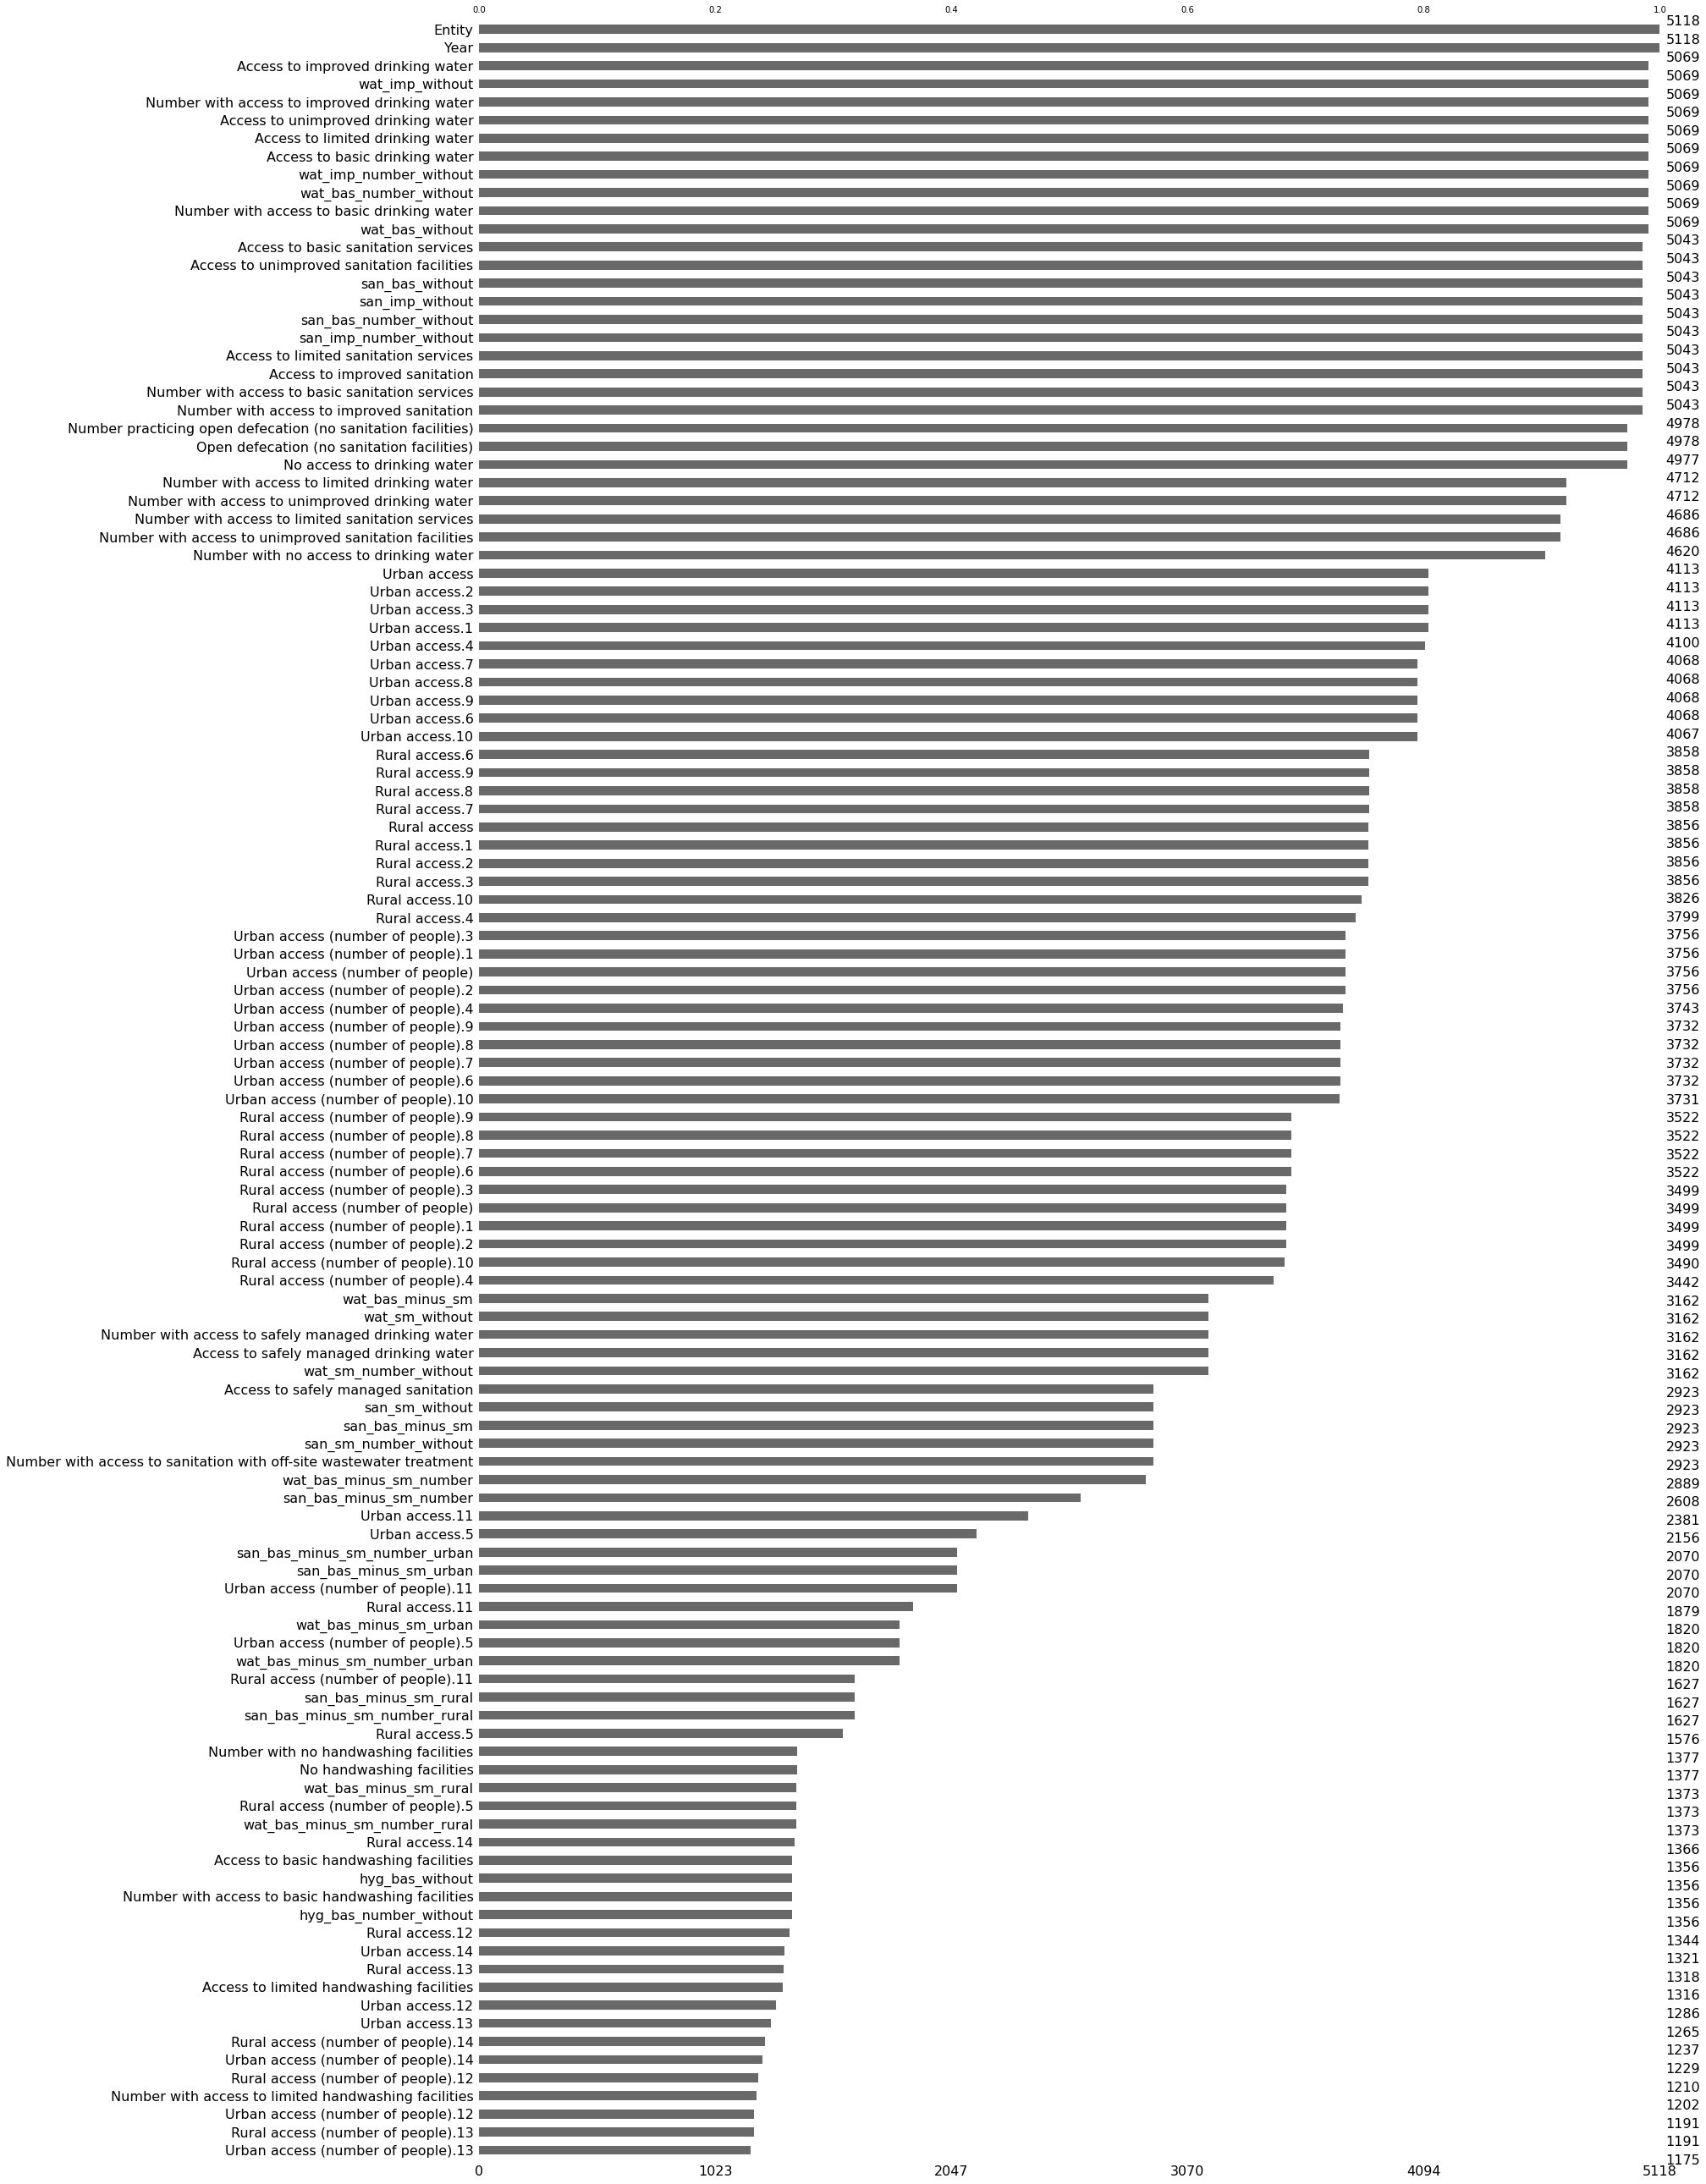

In [20]:
msno.bar(df_wat_san,sort="ascending")

In [23]:
print("--------Percentage of Missing Data in Each Column: --------")
(df_wat_san.isna().sum()/len(df_wat_san)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of Missing Data in Each Column: --------


Access to improved drinking water       0.95%
Access to basic drinking water          0.95%
Access to limited drinking water        0.95%
Access to unimproved drinking water     0.95%
No access to drinking water             2.75%
                                        ...  
san_imp_without                         1.46%
san_bas_without                         1.46%
san_sm_without                         42.88%
hyg_bas_number_without                  73.5%
hyg_bas_without                         73.5%
Length: 118, dtype: object

In [24]:
print("--------Percentage of Missing Data in Each Column: --------")
(df_uns_wat.isna().sum()/len(df_uns_wat)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of Missing Data in Each Column: --------


Entity                                                                                                    0.0%
Code                                                                                                    10.08%
Year                                                                                                      0.0%
Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: Age-standardized (Percent)      0.0%
dtype: object

In [25]:
print("--------Percentage of Missing Data in Each Column: --------")
(df_uns_san.isna().sum()/len(df_uns_san)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of Missing Data in Each Column: --------


Entity                                                                                                  0.0%
Code                                                                                                  10.08%
Year                                                                                                    0.0%
Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: Age-standardized (Percent)      0.0%
dtype: object

In [26]:
print("Columns of the original data set : %d \n" % df_wat_san.shape[1])

Columns of the original data set : 118 



The deleted columns are related to handwashing facilities and I will not be analyzing these issues, so I am deleting columns with more than 60% missing data to make my dataset more comfortable.

In [27]:
ms_drop = len(df_wat_san) * .4
df_wat_san.dropna(thresh = ms_drop, axis = 1, inplace = True)

In [29]:
print("Number of columns after removing missing data : %d" % df_wat_san.shape[1])

Number of columns after removing missing data : 87


<Axes: >

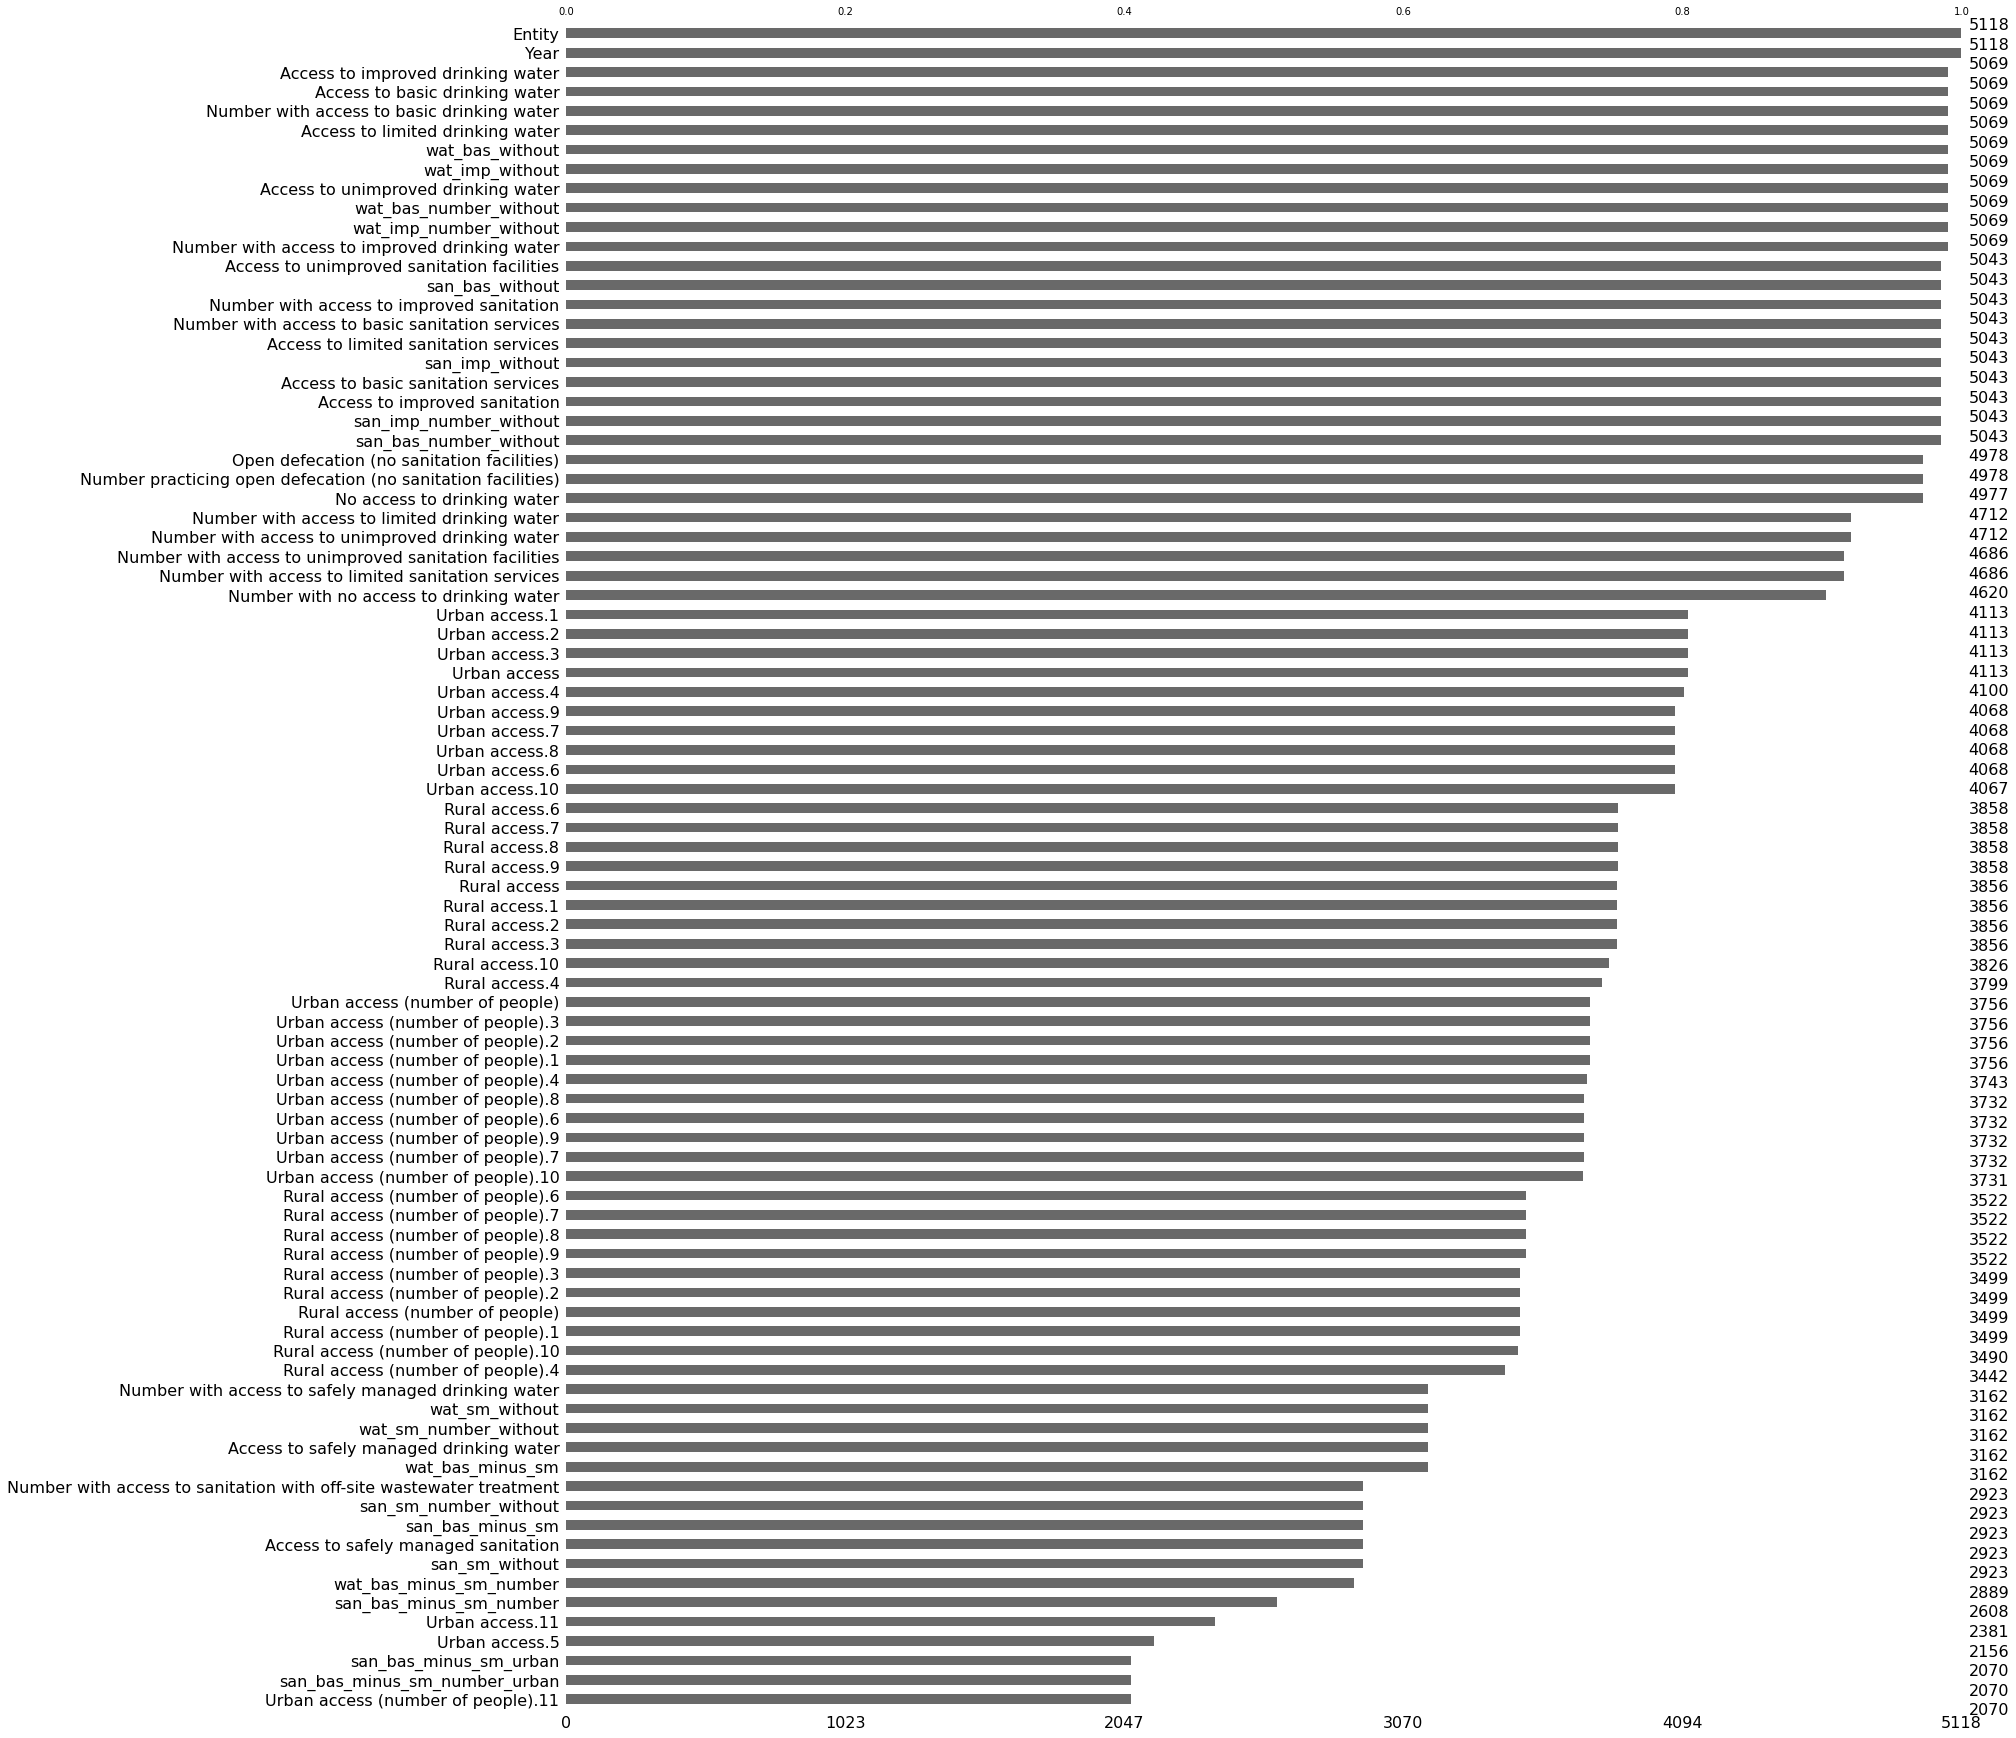

In [30]:
msno.bar(df_wat_san,sort="ascending")

In [31]:
df_wat_san.describe()

,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,...,wat_sm_number_without,wat_imp_without,wat_bas_without,wat_sm_without,san_imp_number_without,san_bas_number_without,san_sm_number_without,san_imp_without,san_bas_without,san_sm_without
count,5069.000000,5069.000000,5069.000000,5069.000000,4977.000000,3162.000000,5043.000000,5043.000000,5043.000000,5043.000000,...,3.162000e+03,5069.000000,5069.000000,3162.000000,5.043000e+03,5.043000e+03,2.923000e+03,5043.000000,5043.000000,2923.000000
mean,89.781385,86.299089,3.482288,6.800992,3.480802,70.462694,80.681227,74.231402,6.449931,10.179954,...,6.160599e+07,10.218615,13.700911,29.537306,3.539685e+07,4.474263e+07,1.276698e+08,19.318773,25.768598,47.896811
std,13.991935,17.821044,5.724875,9.315317,6.366245,30.042047,24.481779,29.077380,8.015488,14.185201,...,2.484465e+08,13.991935,17.821044,30.042047,1.664895e+08,2.071364e+08,4.552937e+08,24.481779,29.077380,29.451129
min,24.580000,18.090000,0.000000,0.000000,0.000000,2.330000,6.460000,2.760000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,84.940000,80.440000,0.000000,0.400000,0.000000,46.810000,66.975000,52.680000,0.230000,0.480000,...,3.567575e+04,0.480000,0.630000,3.252500,2.938500e+03,1.428800e+04,9.061300e+05,0.760000,1.950000,20.540000
50%,96.430000,94.770000,0.650000,2.620000,0.160000,81.785000,93.490000,87.710000,3.590000,3.670000,...,9.355090e+05,3.570000,5.230000,18.215000,1.868650e+05,4.044530e+05,3.923276e+06,6.510000,12.290000,51.430000
75%,99.520000,99.370000,4.910000,9.540000,4.150000,96.747500,99.240000,98.050000,9.495000,14.620000,...,9.411150e+06,15.060000,19.560000,53.190000,4.613220e+06,6.644786e+06,2.105271e+07,33.025000,47.320000,75.215000
max,100.000000,100.000000,37.500000,56.920000,46.350000,100.000000,100.000000,100.000000,50.850000,81.820000,...,2.423291e+09,75.420000,81.910000,97.670000,2.371646e+09,2.716610e+09,4.422033e+09,93.540000,97.240000,97.880000


Regionally safe water (for Africa)

improved water source consists of these three topics
* basic
* limited
* safely managed

<center><img src= "https://ourworldindata.org/uploads/2021/06/Clean-water-definitions.png" alt ="Titanic" style='width:500px;'></center><br>

In [146]:
countries = ["Morocco", "Algeria","Tunisia", "Libya", "Egypt", 
             "Sudan, ""Eritrea", "Ethiopia", "Djibouti", "Somalia", 
             "Kenya", "Uganda", "Tanzania", "Rwanda", "Mozambique", 
             "Comoros", "Malawi", "Zambia", "South Africa", "Bostwana", 
             "Namibia", "Lesotho", "Angola", "Democratic Republic of Congo", 
             "Congo", "Gabon", "Cameroon", "Central Afrikan Republic", "Chad", 
             "Nigeria", "Benin", "Togo", "Ghana", "Burkina Faso", "Cote d'Ivoire", 
             "Liberia", "Sierra Leone", "Guinea", "Mali", "Senegal", "Guinea-Bissau",
             "Mauritania", "Niger", "South Sudan", "Burundi", "Madagascar", "Sub-Saharan Africa" ]
selected_data = df_wat_san[df_wat_san["Entity"].isin(countries)]

columns = ["Access to basic drinking water", "Access to limited drinking water", "Access to safely managed drinking water", "Year", "Entity"]
selected_data = selected_data[columns]

In [33]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 42 to 5096
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Access to basic drinking water           891 non-null    float64
 1   Access to limited drinking water         891 non-null    float64
 2   Access to safely managed drinking water  378 non-null    float64
 3   Year                                     891 non-null    int64  
 4   Entity                                   891 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 41.8+ KB


In [50]:
import plotly.express as px

selected_data = df_wat_san[df_wat_san['Year'] == 2020]
selected_data = selected_data[selected_data['Entity'].isin(countries)]
selected_data = selected_data[['Entity', 'Access to basic drinking water', 'Access to limited drinking water', 'Access to safely managed drinking water']]

selected_data = selected_data.melt(id_vars='Entity', var_name='Water Source', value_name='Percentage')

fig = px.bar(selected_data, x='Entity', y='Percentage', color='Water Source', barmode='group')

fig.update_layout(
    title='Water Access in African Countries in 2020',
    xaxis_title='Country',
    yaxis_title='Percentage of Population',
    legend_title='Water Source'
)

fig.show()


**In 2020, 6% of the world population did not have access to an improved water source.**

In [145]:
europe_countries = ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',  
                    'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia',
                    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
                    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Montenegro', 'Netherlands',
                    'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic',
                    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
selected_data_eu = df_wat_san[df_wat_san["Entity"].isin(europe_countries)]

columns = ["Access to basic drinking water", "Access to limited drinking water", "Access to safely managed drinking water", "Year", "Entity"]
selected_data_eu = selected_data_eu[columns]

### For Europe

In [99]:
selected_data_eu = df_wat_san[df_wat_san['Year'] == 2020]
selected_data_eu = selected_data_eu[selected_data_eu['Entity'].isin(europe_countries)]
selected_data_eu = selected_data_eu[['Entity', 'Access to basic drinking water', 'Access to limited drinking water', 'Access to safely managed drinking water']]

selected_data_eu = selected_data_eu.melt(id_vars='Entity', var_name='Water Source', value_name='Percentage')

fig = px.bar(selected_data_eu, x='Entity', y='Percentage', color='Water Source', barmode='group')

fig.update_layout(
    title='Water Access in Europe Countries in 2020',
    xaxis_title='Country',
    yaxis_title='Percentage of Population',
    legend_title='Water Source'
)

fig.show()


# Regionally sanitation (for Africa)

improved water source consists of these three topics

* basic
* limited
* safely managed

<center><img src= "https://ourworldindata.org/uploads/2021/06/Sanitation-definitions.png" alt ="Titanic" style='width:500px;'></center><br>

In [147]:
countries = ["Morocco", "Algeria","Tunisia", "Libya", "Egypt", 
             "Sudan, ""Eritrea", "Ethiopia", "Djibouti", "Somali", 
             "Kenya", "Uganda", "Tanzania", "Rwanda", "Mozambique", 
             "Comoros", "Malawi", "Zambia", "South Africa", "Bostwana", 
             "Namibia", "Lesotho", "Angola", "Democratic Republic of Congo", 
             "Congo", "Gabon", "Cameroon", "Central Afrikan Republic", "Chad", 
             "Nigeria", "Benin", "Togo", "Ghana", "Burkina Faso", "Cote d'Ivoire", 
             "Liberia", "Sierra Leone", "Guinea", "Mali", "Senegal", "Guinea", "Bissau",
             "Mauritania", "Niger", "South Sudan", "Burundi", "Madagascar", "Western Sahara" ]
selected_data = df_wat_san[df_wat_san["Entity"].isin(countries)]

columns = ["Access to basic sanitation services", "Access to limited sanitation services", "Access to safely managed sanitation", "Year", "Entity"]
selected_data = selected_data[columns]

In [138]:
selected_data = df_wat_san[df_wat_san['Entity'].isin(countries)]
selected_data = selected_data[['Entity','Year','Access to basic sanitation services', 'Access to limited sanitation services', 'Access to safely managed sanitation']]
selected_data = selected_data.melt(id_vars=['Entity','Year'], var_name='San Source', value_name='Percentage')

fig = px.line(selected_data, x='Year', y='Percentage', color='San Source', facet_col='Entity',
              facet_col_wrap=5)

fig.update_layout(
    title='Sanitation Access in African Countries from 2000 to 2020',
    xaxis_title='Year',
    yaxis_title='%',
    legend_title='San Source'
)

fig.show()


### For Europe

In [137]:
selected_data_eu = df_wat_san[df_wat_san['Entity'].isin(europe_countries)]
selected_data_eu = selected_data_eu[['Entity','Year','Access to basic sanitation services', 'Access to limited sanitation services', 'Access to safely managed sanitation']]
selected_data_eu = selected_data_eu.melt(id_vars=['Entity','Year'], var_name='San Source', value_name='Percentage')

fig = px.line(selected_data_eu, x='Year', y='Percentage', color='San Source', facet_col='Entity',
              facet_col_wrap=5)

fig.update_layout(
    title='Sanitation Access in European Countries from 2000 to 2020',
    xaxis_title='Year',
    yaxis_title='%',
    legend_title='San Source'
)

fig.show()


# Deaths due to unsafe water and inadequate sanitation by year

In [139]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
Year = go.Scatter(
                    x = df_uns_wat.Year,
                    y = df_uns_wat.Deaths_cause,
                    mode = "lines",
                    name = "water",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df_uns_wat.Deaths_cause)
# Creating trace2
Deaths = go.Scatter(
                    x = df_uns_san.Year,
                    y = df_uns_san.Deathss_cause,
                    mode = "lines+markers",
                    name = "sanitation",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))
data = [Year, Deaths]
layout = dict(title = 'Deaths due to unsafe water and inadequate sanitation by year',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

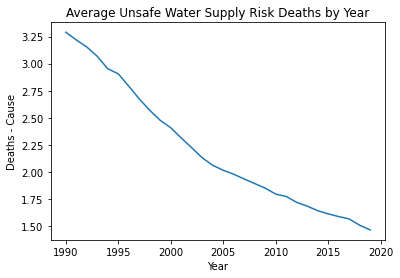

In [126]:
grouped = df_uns_wat.groupby('Year')['Deaths_cause'].mean()

plt.plot(grouped.index, grouped.values)

plt.xlabel('Year')
plt.ylabel('Deaths - Cause')
plt.title('Average Unsafe Water Supply Risk Deaths by Year')
plt.show()

**About Licenses:**
 All visualizations, data, and articles produced by Our World in Data are open access under the Creative Commons BY license. You have permission to use, distribute, and reproduce these in any medium, provided the source and authors are credited. All the software and code that we write is open source and made available via GitHub under the permissive MIT license. All other material, including data produced by third parties and made available by Our World in Data, is subject to the license terms from the original third-party authors.


https://creativecommons.org/licenses/by/4.0/